<a href="https://colab.research.google.com/github/naldo14/tesis-/blob/main/casewest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Esta data es la data asociada a la falla en el rodamiento FAN-END

In [1]:
import h5py #librerua para crear archivos , h5py
import sys
import numpy as np
import math
from scipy import signal    #aqui estoy usando la libreria signal
import scipy.io
import os
import pandas as pd
import pywt
import tensorflow_probability as tfp
from tensorflow import keras
tfd = tfp.distributions
tfpl = tfp.layers
from tensorflow.keras.callbacks import LearningRateScheduler

In [2]:
#hacer el mounted de mi cuenta drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
output_file=[]
output_file.append('/content/drive/MyDrive/tesis USB /case west reserve university/data_2')

In [ ]:
# # Path to the .zip file in Google Drive
# #hago el unar del archivo
# !pip install rarfile

# from google.colab import drive
# import rarfile
# zip_file_path ="/content/drive/MyDrive/tesis USB /case west reserve university/data_2/data_2.rar"

# with rarfile.RarFile(zip_file_path, 'r') as rf:
#     rf.extractall(output_file[0])

In [ ]:
# file_names = ["inner.h5", "outter.h5", "outter1.h5","ball.h5"]
# drive_path="/content/drive/MyDrive/tesis USB /case west reserve university/data_2"
# for file_name in file_names:
#     h5_file_path = os.path.join(drive_path, file_name)
#     with h5py.File(h5_file_path, 'w') as h5file:
#         # You can optionally add attributes, datasets, or groups to the file
#         # h5file.create_dataset("dataset_name", data=None)
#         # h5file.create_group("group_name")
#         # h5file.attrs["attribute_name"] = "attribute_value"
#         print("Empty H5PY files created in Google Drive.")


Empty H5PY files created in Google Drive.
Empty H5PY files created in Google Drive.
Empty H5PY files created in Google Drive.
Empty H5PY files created in Google Drive.
Empty H5PY files created in Google Drive.


In [ ]:
# ### function to storaged all the .mat file into the h5py's file
# def save_mat_to_h5py(mat_files_directories, h5py_file_names):
#     if len(mat_files_directories) != len(h5py_file_names):
#         print("Error: The number of directories and h5py file names should match.")
#         return

#     for mat_files_directory, h5py_file_name in zip(mat_files_directories, h5py_file_names):
#         # Open the h5py file
#         with h5py.File(h5py_file_name, 'w') as h5file:
#             # Get the list of .mat files in the directory
#             mat_files = [f for f in os.listdir(mat_files_directory) if f.endswith(".mat")]

#             # Add each .mat file content to the h5py file
#             for mat_file in mat_files:
#                 # Load the ..mat file
#                 mat_data = scipy.io.loadmat(os.path.join(mat_files_directory, mat_file))

#                 # Create datasets for each variable in the .mat file
#                 for var_name, var_data in mat_data.items():
#                     h5file.create_dataset(f"{mat_file}/{var_name}", data=var_data)

# mat_files_directories = [
#     '/content/drive/MyDrive/tesis USB /case west reserve university/data_2/data_2/inner',
#        '/content/drive/MyDrive/tesis USB /case west reserve university/data_2/data_2/outter',
#     '/content/drive/MyDrive/tesis USB /case west reserve university/data_2/data_2/outter_1',
#     '/content/drive/MyDrive/tesis USB /case west reserve university/data_2/data_2/ball'

# ]
# h5py_file_names = [
#     '/content/drive/MyDrive/tesis USB /case west reserve university/data_2/inner.h5',
#     '/content/drive/MyDrive/tesis USB /case west reserve university/data_2/outter.h5',
#     '/content/drive/MyDrive/tesis USB /case west reserve university/data_2/outter1.h5',
#     '/content/drive/MyDrive/tesis USB /case west reserve university/data_2/ball.h5'
# ]
# save_mat_to_h5py(mat_files_directories, h5py_file_names)

In [4]:
# 'data' now contains a dictionary where the keys are the .mat file names
# and the values are dictionaries containing the arrays for each .mat file

def get_h5py_data(h5py_file_path):
    data = {}

    # Open the h5py file
    with h5py.File(h5py_file_path, 'r') as h5file:
        # List the keys (dataset names) in the h5py file
        keys = list(h5file.keys())

        for key in keys:
            # Access the content of the .mat file (dataset)
            mat_data = h5file[key]

            # Create a dictionary to store the arrays for this .mat file
            arrays = {}

            for subkey, value in mat_data.items():
                if isinstance(value, h5py.Group):
                    # If it's a group (nested data), you can access its keys
                    subkeys = list(value.keys())
                    for subkey in subkeys:
                        # Access the actual data (arrays) and store in the dictionary
                        subkey_data = value[subkey][()]
                        arrays[subkey] = subkey_data
                else:
                    # If it's a dataset (e.g., a variable), you can access its value
                    # and store it in the dictionary using the original key
                    variable_data = value[()]
                    arrays[subkey] = variable_data

            # Store the arrays for this .mat file in the data dictionary
            data[key] = arrays

    return data


In [5]:

def band_maker(coeffs, fs, title):
    p = len(coeffs)- 1
    low_frequencies = [None] * len(coeffs)
    high_frequencies = [None] * len(coeffs)

    # low_frequencies[0] = 0
    # high_frequencies[0] = fs / (2 ** (p) * 2)
    for i in range(0, len(coeffs)):
         high_frequencies[i] = fs / (2 ** (p+-i + 1))
    low_frequencies[0]=0
    low_frequencies[1:len(low_frequencies)]= high_frequencies[:len(low_frequencies) - 1]



    return  high_frequencies,low_frequencies

In [6]:
def frequencies_maker(N,fs,d,D,theta):
  theta=(theta/180)*np.pi
  FTF=(fs/2)*(1-d/D*np.cos(theta))
  BPFI=(N*fs/2)*(1+d/D*np.cos(theta))
  BPFO=(N*fs/2)*(1-d/D*np.cos(theta))
  BSF=(D*fs/d)*(1-(d/D)**2*np.cos(theta))
  return(FTF,BPFI,BPFO,BSF)


In [7]:
FTF,BPFI,BPFO,BSF=frequencies_maker(9,50.17,7.90,38.5,0) #estos datos son para el daata set coreano
data = {
    'Name': ['Fundamental train frequency (FTF)', 'Ball pass frequency inner (BPFI)', 'Ball pass frequency outer (BPFO)','Ball spin frequency (BSF)'],
    'Values (HZ)': [FTF, BPFI, BPFO,BSF]
}

# Create a dataframe from the dictionary
df = pd.DataFrame(data)

# Print the dataframe
print(df)

                                Name  Values (HZ)
0  Fundamental train frequency (FTF)    19.937688
1   Ball pass frequency inner (BPFI)   272.090805
2   Ball pass frequency outer (BPFO)   179.439195
3          Ball spin frequency (BSF)   234.204744


In [8]:
def cwt_maker(dic_data, wavelet='db38', level=5):
  w = pywt.Wavelet(wavelet)
  coeffs = pywt.wavedec(dic_data, w, level=level)
  print(level)
  energies_levels = [np.sum(np.abs(coeffs)**2) for coeffs in coeffs]
  array_dwt = energies_levels

  return (np.array(array_dwt))


In [9]:
#aqui solo normalizo los niveles energeticos

def normalization_from_coeffs(coeffs):

    mean_energy = np.mean(coeffs)
    std_energy = np.std(coeffs)

    # Calculate Z-scores
    z_scores = [(energy - mean_energy) / std_energy for energy in coeffs]

    return z_scores

In [10]:
## calculo el nivel del banco de filtro:
fs=math.ceil(FTF) #frecuencia natural , se usa la del train frequencie
fe=25.6e3 # frecuencia de sampleo
n = math.ceil(math.log(fe / fs) / math.log(2)) +2
level = n

In [11]:
def get_data(file_path, wavelet, level, exclude_keys=None):
    # Get the data from the H5PY file
    data = get_h5py_data(file_path)

    # Get the order of experiments (sorted keys)
    experiment_order = sorted(data.keys())

    # Create an empty list to store the coefficients
    coefficients_list_DE = []
    coefficients_list_FE = []

    # Process each experiment and calculate coefficients
    for experiment in experiment_order:
        if exclude_keys and experiment in exclude_keys:
            continue  # Skip this experiment

        # Reshape the data for the current experiment
        reshaped_data_DE = data[experiment][list(data[experiment].keys())[1]].reshape(-1) #drive end data
        reshaped_data_FE = data[experiment][list(data[experiment].keys())[2]].reshape(-1) #fan end data

        # Calculate CWT coefficients for the experiment using drive end data
        coefficients_DE = cwt_maker(reshaped_data_DE, wavelet, level)
        coefficientes_normalized_DE = normalization_from_coeffs(coefficients_DE)

        # Calculate CWT coefficients for the experiment using FAN end data
        coefficients_FE = cwt_maker(reshaped_data_FE, wavelet, level)
        coefficientes_normalized_FE = normalization_from_coeffs(coefficients_FE)

        # Append the coefficients to the list
        coefficients_list_DE.append(coefficientes_normalized_DE)
        coefficients_list_FE.append(coefficientes_normalized_FE)

    return coefficients_list_DE, coefficients_list_FE

Calculo de los niveles energeticos normalazidos para falla en el anillo externo

In [12]:
file_path= '/content/drive/MyDrive/tesis USB /case west reserve university/data_2/outter.h5'
normalized_outter_DE,normalized_outter_FE= get_data(file_path, 'db38', level)

13
13
13
13
13
13
13
13


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 13 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [15]:
file_path=  "/content/drive/MyDrive/tesis USB /case west reserve university/data_2/outter1.h5"
normalized_outter_1_DE,normalized_outter_1_FE= get_data(file_path, 'db38', level)

13
13
13
13
13
13
13
13
13
13
13
13


In [16]:
file_path=   "/content/drive/MyDrive/tesis USB /case west reserve university/data_2/inner.h5"
normalized_inner_DE,normalized_inner_FE= get_data(file_path, 'db38', level)

13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13


In [17]:
file_path="/content/drive/MyDrive/tesis USB /case west reserve university/data_2/ball.h5"
normalized_ball_DE,normalized_ball_FE= get_data(file_path, 'db38', level)

13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13


### creacion y concatenacion de los arrays asociados a la condicion de falla externa

In [18]:
### creacion y concatenacion de los arrays asociados a la condicion de falla externa
array_outter_FE = np.array(normalized_outter_FE)
array_outter_DE = np.array(normalized_outter_DE)

# Concatenate the arrays along axis 0 (stack them vertically)
array_outter = np.concatenate([array_outter_FE, array_outter_DE ], axis=0)
array_outter.shape

(8, 14)

### creacion y concatenacion de los arrays asociados a la condicion de falla externo pero con el acelerometro en otra disposicion

In [19]:
### creacion y concatenacion de los arrays asociados a la condicion de falla externa
array_outter_1_FE = np.array(normalized_outter_1_FE)
array_outter_1_DE = np.array(normalized_outter_1_DE)

# Concatenate the arrays along axis 0 (stack them vertically)
array_outter_1 = np.concatenate([array_outter_1_FE, array_outter_1_DE ], axis=0)
array_outter_1.shape

(12, 14)

### creacion y concatenacion de los arrays asociados a la condicion de falla interna

In [20]:
### creacion y concatenacion de los arrays asociados a la condicion de falla interna
array_inner_FE = np.array(normalized_inner_FE)
array_inner_DE = np.array(normalized_inner_DE)

# Concatenate the arrays along axis 0 (stack them vertically)
array_inner = np.concatenate([array_inner_FE, array_inner_DE ], axis=0)
array_inner.shape

(24, 14)

### creacion y concatenacion de los arrays asociados a la condicion de falla en el elemento rodante

In [21]:
### creacion y concatenacion de los arrays asociados a la condicion de falla interna
array_ball_FE = np.array(normalized_ball_FE)
array_ball_DE = np.array(normalized_ball_DE)

# Concatenate the arrays along axis 0 (stack them vertically)
array_ball = np.concatenate([array_ball_FE, array_ball_DE ], axis=0)
array_ball.shape

(20, 14)

### creacion de los targets

In [22]:
def create_mask_array(variable, variable_name, substring):
    # Create an array to store the mask values
    if substring in variable_name:
        mask_array = np.zeros((len(variable), 1))
    else:
        mask_array = np.ones((len(variable), 1))
    return mask_array

In [23]:
outter_targets=create_mask_array(array_outter, "array_outter", "normal")

In [24]:
outter_targets_1=create_mask_array(array_outter_1, "array_outter_1", "normal")

In [25]:
inner_targets=create_mask_array(array_inner, "array_inner", "normal")

In [26]:
ball_targets=create_mask_array(array_ball, "array_ball", "normal")

### concatenacion de los targets

In [27]:
y_targets = np.concatenate(( outter_targets, outter_targets_1, inner_targets,ball_targets))

### concatenacion de los features

In [28]:
x_features=np.concatenate(( array_outter, array_outter_1, array_inner,array_ball))

#### Almaceno la nueva data en google drive





In [31]:
#creo el h5py de las features
data=x_features
path_features="/content/drive/MyDrive/tesis USB /case west reserve university/data_2/features"
hdf5_file_path = path_features
# with h5py.File(hdf5_file_path, 'w') as hf:
#     hf.create_dataset('features', data=data)
with h5py.File(hdf5_file_path, 'r') as hf:
    x_features_1 = hf['features'][:]


In [32]:
#creo el h5py de las features
data=y_targets
path_features="/content/drive/MyDrive/tesis USB /case west reserve university/data_2/targets"
hdf5_file_path = path_features
# with h5py.File(hdf5_file_path, 'w') as hf:
#     hf.create_dataset('targets', data=data)
with h5py.File(hdf5_file_path, 'r') as hf:
    y_targets_1 = hf['targets'][:]


### Entrenamiento de la red

In [35]:
from sklearn.model_selection import train_test_split

# Assuming x is your dataset with shape (70, 14) and y is your labels
x_shape = x_features_1.shape[0]
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# Split the dataset into a temporary training set and a test set
x_temp, x_test, y_temp, y_test = train_test_split(x_features_1, y_targets_1, test_size=test_ratio, random_state=42)

# Split the temporary dataset into a training set and a validation set
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=val_ratio / (1 - test_ratio), random_state=42)

# Now, x_train, y_train, x_val, y_val, x_test, and y_test contain the data and labels for each set

# Shuffle the rows
train_indices = np.random.permutation(len(x_train))
val_indices = np.random.permutation(len(x_val))
test_indices = np.random.permutation(len(x_test))

x_train, y_train = x_train[train_indices], y_train[train_indices]
x_val, y_val = x_val[val_indices], y_val[val_indices]
x_test, y_test = x_test[test_indices], y_test[test_indices]

Epoch 1/1000
2/2 - 3s - loss: 1.5062 - accuracy: 0.0000e+00 - false_negatives: 38.0000 - false_positives: 0.0000e+00 - val_loss: 1.4560 - val_accuracy: 0.0000e+00 - val_false_negatives: 13.0000 - val_false_positives: 0.0000e+00 - 3s/epoch - 1s/step
Epoch 2/1000
2/2 - 0s - loss: 1.4486 - accuracy: 0.0000e+00 - false_negatives: 38.0000 - false_positives: 0.0000e+00 - val_loss: 1.4058 - val_accuracy: 0.0000e+00 - val_false_negatives: 13.0000 - val_false_positives: 0.0000e+00 - 83ms/epoch - 41ms/step
Epoch 3/1000
2/2 - 0s - loss: 1.3996 - accuracy: 0.0000e+00 - false_negatives: 38.0000 - false_positives: 0.0000e+00 - val_loss: 1.3640 - val_accuracy: 0.0000e+00 - val_false_negatives: 13.0000 - val_false_positives: 0.0000e+00 - 64ms/epoch - 32ms/step
Epoch 4/1000
2/2 - 0s - loss: 1.3584 - accuracy: 0.0000e+00 - false_negatives: 38.0000 - false_positives: 0.0000e+00 - val_loss: 1.3261 - val_accuracy: 0.0000e+00 - val_false_negatives: 13.0000 - val_false_positives: 0.0000e+00 - 136ms/epoch - 6

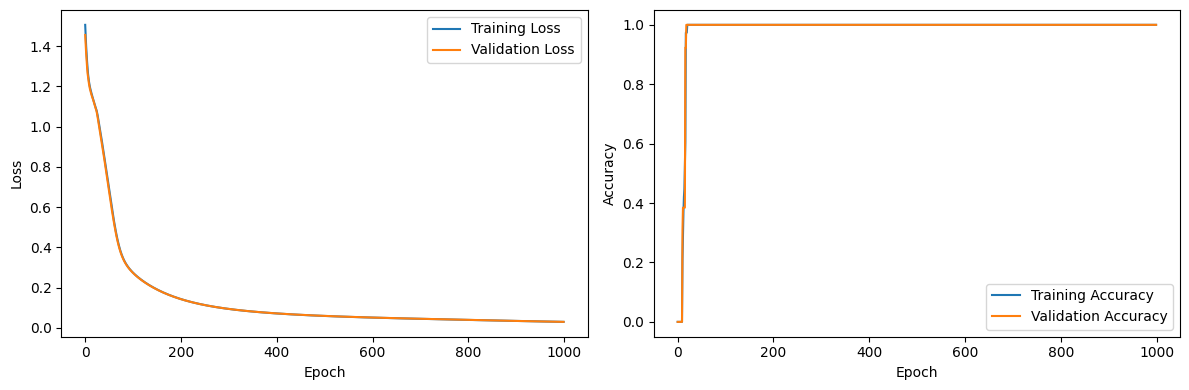

1/1 [==============================] - 0s 27ms/step - loss: 0.0299 - accuracy: 1.0000 - false_negatives: 0.0000e+00 - false_positives: 0.0000e+00
Test Loss: 0.0299
Test Accuracy: 100.00%
False Negatives: 0
False Positives: 0
1/1 [==============================] - 0s 96ms/step
Confusion Matrix:
[[13]]


In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
### need to add some dropeout
# Define the model with kernel regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(14,), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(5, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])





# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()])

# def lr_schedule(epoch):
#     if epoch < 100:
#         return 0.001  # Initial learning rate for the first 100 epochs
#     elif epoch < 200:
#         return 0.0001  # Lower learning rate for the next 100 epochs
#     else:
#         return 0.00001  # Further lower learning rate for subsequent epochs

# # Create a learning rate scheduler callback
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# Include the callback in model training
# history = model.fit(x_train, y_train, epochs=600, validation_data=(x_val, y_val), callbacks=[lr_scheduler], verbose=2)
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_val, y_val), verbose=2)
# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Evaluate the model on the test data
test_loss, test_accuracy, false_negatives, false_positives = model.evaluate(x_test, y_test) #Returns the loss value & metrics values for the model in test mode (this is for testing time, with the testing dataset).

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"False Negatives: {false_negatives:.0f}")
print(f"False Positives: {false_positives:.0f}")

# Make predictions on test data
y_pred = model.predict(x_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(confusion)